# GML - Mini-Challenge 2 - FS 2022

**Ausgabe:** Montag, 25. April 2022  
**Abgabe:** Sonntag, 22. Mai 2022, bis 24 Uhr 

In diesem Mini-Challenge implementieren und verwenden wir verschiedene Methoden der Klassifikation, machen Gebrauch von Model Selection-Prinzipien und -Algorithmen und stellen Gedanken zu Ensemble Methoden an.

#### Vorgaben zu Umsetzung und Abgabe

- Code muss in python geschrieben werden.
- Wir entwickeln die meisten Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. 
- Es darf kein Code ausgelagert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Colorbar, ..) um den Plot verstehen zu können.
- Zu jedem Plot gibt es eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält.  
- Als **Abgabe** zählt der letzte Commit in deinem Fork des Trainingcenter Repos vor Abgabetermin.  



- **Bitte lösche, dupliziere oder verschiebe die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Du darfst aber beliebig viele weitere Zellen hinzufügen.
- Bitte importiere Daten mit **relativen Pfaden** innerhalb des Repos.

Für die Erarbeitung der Inhalte darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**

---

### Aufgabe 1 - EDA (4 Punkte)

Lade den Datensatz `data/moto.csv` und verschaffe dir einen Überblick durch explorative Datenanalyse. Unser Ziel wird es sein, die Marke der Motorräder vorherzusagen unter Verwendung der übrigen Attribute. Teile deine Überlegungen zu diesem Problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# YOUR CODE HERE
df_moto = pd.read_csv('../data/moto.csv')
df_moto

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
2,Strasse,grün,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,11990,285.0,0,10.0,Kawasaki
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,10500,262.0,12,10.0,Kawasaki
...,...,...,...,...,...,...,...,...,...,...,...,...
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki
5616,Strasse,schwarz matt.,Occasion,997.0,Benzin,False,188.0,5990,283.0,112,17400.0,Kawasaki
5617,Strasse,schwarz,Neu,998.0,Benzin,True,200.0,19990,281.0,0,10.0,Kawasaki


In [3]:
df_moto.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   body_shape        5619 non-null   object 
 1   colour            5605 non-null   object 
 2   condition         5619 non-null   object 
 3   displacement      5619 non-null   float64
 4   fuel              5612 non-null   object 
 5   has_mfk           5619 non-null   bool   
 6   performance       5619 non-null   float64
 7   price             5619 non-null   int64  
 8   curb_weight       5619 non-null   float64
 9   registration_age  5619 non-null   int64  
 10  mileage           5619 non-null   float64
 11  brand             5619 non-null   object 
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 488.5+ KB


**Ueberblick verschaffen:**
1. Datentypen untersuchen
1. fehlende Werte und Outliers suchen
1. Fehler in den Daten Suchen und ggf. korrigieren
1. Kolinearität zwischen Attributen suchen
1. Variablen Transformationen untersuchen
1. Erweiterung eda mit Fokus auf Ziel Attribut (Marke der Motorräder)

**1.** Datentypen untersuchen
- Attr:body_shape hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:colour hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:condition hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:fuel hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:brand hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung

In [4]:
df_moto_clean = df_moto.copy()

attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand']
for attr in attributs_cat:
    df_moto_clean[attr] = df_moto_clean[attr].astype("category")
df_moto_clean.dtypes

body_shape          category
colour              category
condition           category
displacement         float64
fuel                category
has_mfk                 bool
performance          float64
price                  int64
curb_weight          float64
registration_age       int64
mileage              float64
brand               category
dtype: object

**2.** fehlende Werte und Outliers suchen

In [5]:
# suche fehlende Werte
df_moto_clean.isna().sum()

body_shape           0
colour              14
condition            0
displacement         0
fuel                 7
has_mfk              0
performance          0
price                0
curb_weight          0
registration_age     0
mileage              0
brand                0
dtype: int64

Insgesamt gibt es 14 missings in colour und 7 in fuel. Es könnte untersucht werden wiso es zu fehlenden Werten kommt. Da es jedoch sehr wenige Werte sind werden diese entfernt.

In [6]:
df_moto_clean = df_moto_clean.dropna()

Untersuchen von Verteilungen und Outliers

<ipython-input-7-d2af4b039a6a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)


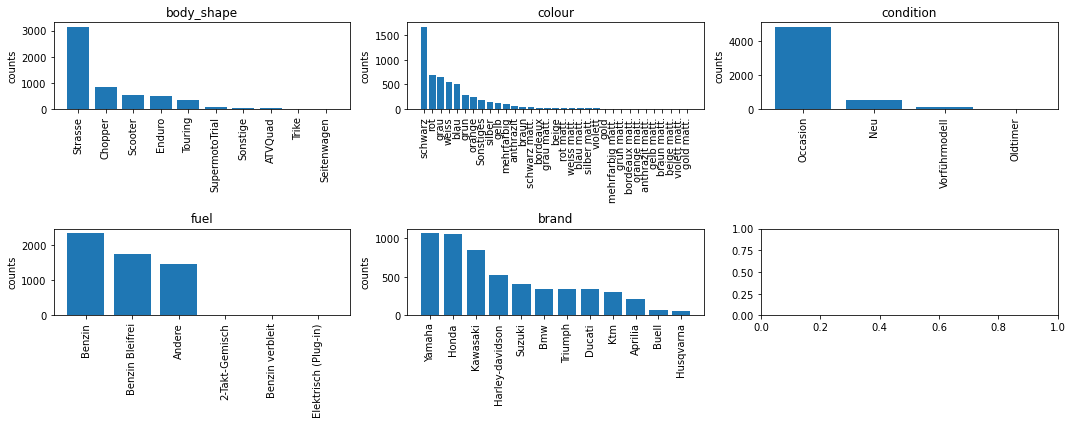

In [7]:
# Verteilung Kategorische Attribute absolute
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand']

for i, attr in enumerate(attributs_cat):
    x = df_moto_clean[attr].value_counts().index.to_list()
    y = df_moto_clean[attr].value_counts()
    ax[i].bar(x, y)
    ax[i].set_title(attr)
    ax[i].set_xticklabels(x, rotation=90)
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

<ipython-input-8-becef6990993>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)


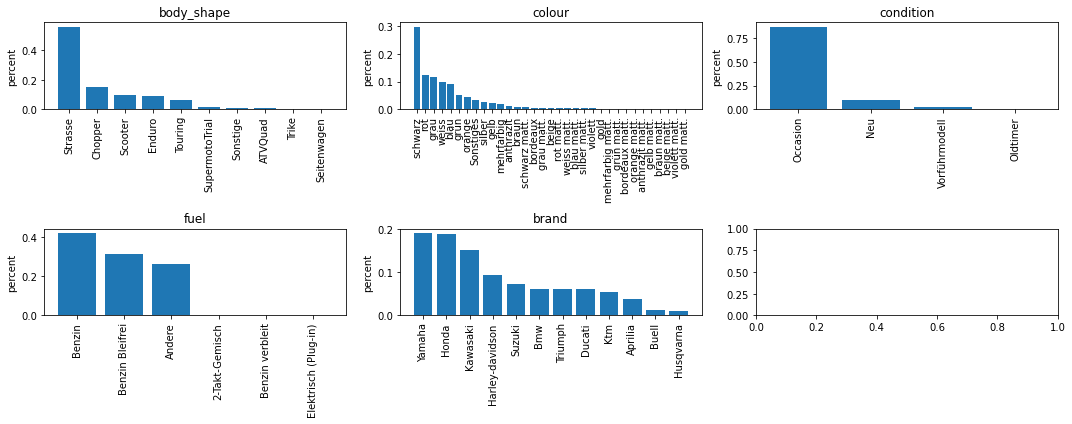

In [8]:
# Verteilung Kategorische Attribute relativ (Prozent)
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand']

for i, attr in enumerate(attributs_cat):
    x = df_moto_clean[attr].value_counts().index.to_list()
    y = df_moto_clean[attr].value_counts() / len(df_moto_clean[attr])
    ax[i].bar(x, y)
    ax[i].set_title(attr)
    ax[i].set_xticklabels(x, rotation=90)
    ax[i].set_ylabel('percent')
fig.tight_layout()
plt.show()

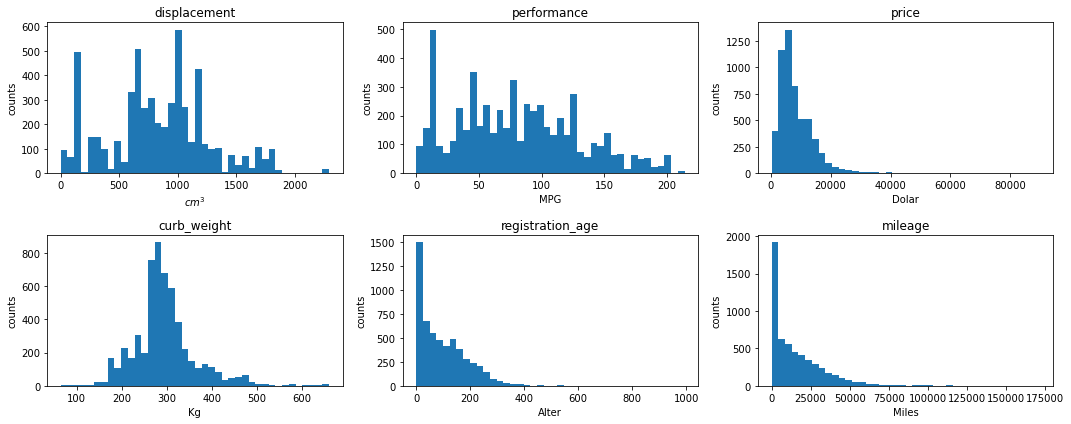

In [9]:
# Verteilung Numerischen Attributen
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attribut_num = ['displacement', 'performance', 'price', 'curb_weight', 'registration_age', 'mileage']
x_units = [r'$cm^3$', 'MPG', 'Dolar', 'Kg', 'Alter', 'Miles']

for i, attr in enumerate(attribut_num):
    ax[i].hist(df_moto_clean[[attr]], bins=40)
    ax[i].set_title(attr)
    ax[i].set_xlabel(x_units[i])
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

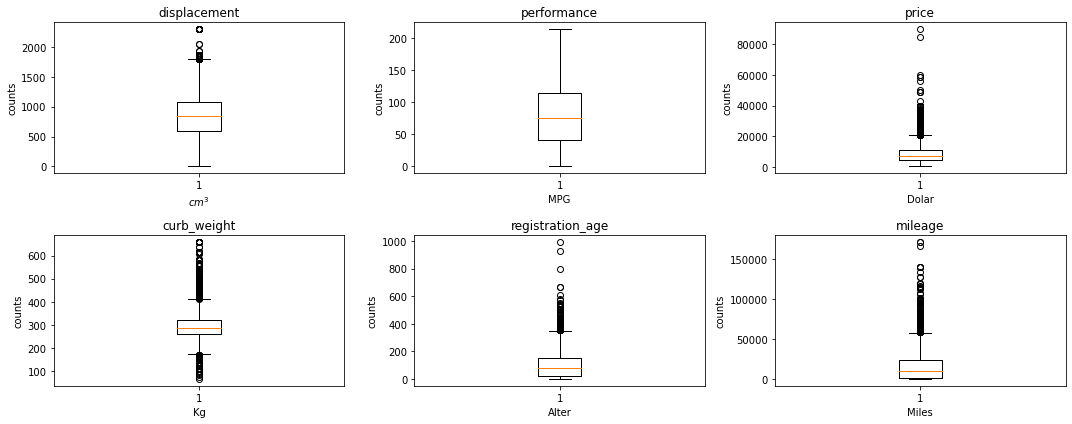

In [10]:
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()

for i, attr in enumerate(attribut_num):
    ax[i].boxplot(df_moto_clean[[attr]])
    ax[i].set_title(attr)
    ax[i].set_xlabel(x_units[i])
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

Fazit aus den oben erstellten Grafiken:
- In den Kategorische Attributen kommen einige Werte sehr oft vor und andere sehr selten. Zum Beispiel ist Condition zu +75% Occasionen, Farbe schwarz ist sehr dominierend mit 30%, die Fareb gold matt praktisch +0%, Oldtimer auch sehr tief). Fuel besteht hauptsächlich aus der Kategorie Benzin, Elektro Motorräder sind wenige vorhanden. 
- Achtung bei der Modellentwicklung mit sehr wenigen Daten in den Kategorischen Daten. Es könnten Modell trainiert werden mit einer gleichen Anzahl Datenpunkte je kategorischem Attribut. Dafür sind aber nicht genügend Daten vorhanden.
- In den Numerischen Werten sieht man ein logarithmisches Verhalten in Preis, Alter und Miles.
- In den Boxplots zeigt sich das Log-Verhalten erneut. 

**3.** Fehler in den Daten suchen
- Aus den Verteilungen der numerischen Daten sollten die 0-Werte oder nahe 0 Werte genauer untersucht werden. Zum Beispiel price, performance, displacement gleich oder nahe an 0 ergeben nicht viel Sinn.
- Bis auf das Attribut:Age sind die maximalen ranges der numersichen Variablen vernümpftige Werte, sollten aber bei der Modellentwicklung evtl erneut untersucht werden 

In [11]:
df_moto_clean[(df_moto_clean['displacement'] < 40)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
1022,Scooter,orange,Occasion,1.0,Benzin verbleit,True,14.96,2800,179.0,46,29200.0,Ktm
3484,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),True,15.00,7800,179.0,35,1700.0,Ktm
3560,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),False,15.00,6900,179.0,58,887.0,Ktm
3561,Enduro,orange,Neu,0.0,Elektrisch (Plug-in),False,15.00,12290,179.0,0,1.0,Ktm
3562,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),True,15.00,8500,179.0,22,300.0,Ktm
3563,Enduro,orange,Neu,0.0,Elektrisch (Plug-in),True,15.00,12990,179.0,0,1.0,Ktm
4096,Enduro,blau,Vorführmodell,0.0,Benzin,True,0.00,14490,340.0,34,100.0,Yamaha
4581,Strasse,schwarz,Neu,15.0,Benzin,False,0.00,4480,182.0,0,1.0,Honda


In [12]:
df_moto_clean[(df_moto_clean['displacement'] > 1800)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
340,Chopper,Sonstiges,Occasion,2053.0,Andere,False,93.0,6000,565.0,141,29000.0,Kawasaki
366,Chopper,Sonstiges,Occasion,2053.0,Andere,False,103.0,7200,556.0,187,60000.0,Kawasaki
769,Chopper,Sonstiges,Occasion,2293.0,Andere,False,141.0,7700,585.0,177,13300.0,Triumph
772,Chopper,rot,Occasion,2294.0,Andere,False,140.0,9990,425.0,153,20236.0,Triumph
774,Chopper,rot,Occasion,2294.0,Andere,False,140.0,34900,425.0,128,38500.0,Triumph
...,...,...,...,...,...,...,...,...,...,...,...,...
5224,Touring,schwarz,Occasion,1867.0,Benzin,True,102.0,28500,488.0,29,19300.0,Harley-davidson
5285,Sonstige,schwarz,Occasion,1867.0,Benzin,True,94.0,35500,392.0,12,10.0,Harley-davidson
5286,Chopper,schwarz,Neu,1867.0,Benzin,True,94.0,42980,392.0,0,10.0,Harley-davidson
5300,Chopper,schwarz,Neu,1867.0,Benzin,True,91.0,28400,378.0,0,1.0,Harley-davidson


Werte unterhalb 40ccm sind eindeutig Datenfehler oder die wenigen Elektro-Motorräder und werden entfernt, Hubraum grösser 1800 ccm werden als Outlier gesehen und entfernt

In [13]:
# Werte unterhalb 40ccm sind eindeutig Datenfehler und werden entfernt
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~((df_moto_clean['displacement'] < 40) | (df_moto_clean['displacement'] > 1800))]
df_moto_clean.shape

(5598, 12)


(5474, 12)

In [14]:
df_moto_clean[df_moto_clean['price'] < 500]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
1913,Scooter,blau,Occasion,125.0,Andere,False,11.0,420,215.0,237,21440.0,Yamaha
2494,Scooter,grau,Occasion,125.0,Benzin Bleifrei,False,14.0,495,224.0,246,20554.0,Honda
2510,Scooter,schwarz,Occasion,49.0,Benzin Bleifrei,False,3.0,279,152.0,274,22200.0,Honda


In [15]:
df_moto_clean[df_moto_clean['price'] > 30_000]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
323,Chopper,grau,Occasion,903.0,Benzin Bleifrei,False,50.00,39500,353.0,130,1500.0,Kawasaki
414,Strasse,schwarz,Occasion,998.0,Benzin Bleifrei,True,200.00,31500,313.0,12,10.0,Kawasaki
2469,Touring,Sonstiges,Occasion,1500.0,Andere,False,82.96,30700,475.0,222,80000.0,Honda
2642,Strasse,schwarz,Oldtimer,1340.0,Benzin Bleifrei,False,40.00,56000,260.0,994,100.0,Harley-davidson
2669,Chopper,Sonstiges,Occasion,1449.0,Andere,False,70.00,32000,526.0,177,15000.0,Harley-davidson
2735,Chopper,anthrazit,Occasion,1689.0,Andere,True,74.00,33900,399.0,48,8042.0,Harley-davidson
2778,Touring,weiss,Occasion,1745.0,Andere,True,89.00,48900,463.0,21,30.0,Harley-davidson
2780,Touring,schwarz,Occasion,1745.0,Andere,True,90.00,33000,463.0,22,5283.0,Harley-davidson
2793,Touring,weiss,Occasion,1745.0,Andere,True,90.00,32900,451.0,26,14000.0,Harley-davidson
2808,Touring,Sonstiges,Occasion,1745.0,Andere,True,91.00,33000,487.0,43,4000.0,Harley-davidson


keine Preise mit 0 festgestellt. tiefste Preise scheinen erklärbar in Anbetracht der mileage. Preise über 30'000 scheinen z.B für Harley-davidson erklärbar. Werden dennoch als Outlier (34 stk.)gesehen und entfernt. Die Grenze kann beim Trainieren und Testen der Modell angepasst werden.

In [16]:
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~(df_moto_clean['price'] > 30_000)]
df_moto_clean.shape

(5474, 12)


(5440, 12)

In [17]:
print(f'max registartion_age = {df_moto_clean["registration_age"].max()}')
df_moto_clean[df_moto_clean['registration_age'] > 100]

max registartion_age = 930


,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
6,Strasse,rot,Occasion,750.0,Benzin Bleifrei,False,76.0,3900,220.0,340,48000.0,Kawasaki
7,Strasse,grau,Occasion,498.0,Benzin Bleifrei,False,27.0,3600,274.0,257,3500.0,Kawasaki
8,Strasse,Sonstiges,Occasion,499.0,Andere,False,34.0,2750,380.0,245,19390.0,Kawasaki
9,Chopper,grau,Occasion,124.0,Benzin Bleifrei,False,11.0,1900,223.0,245,11597.0,Kawasaki
10,Chopper,rot,Occasion,124.0,Benzin Bleifrei,False,12.0,2800,223.0,245,31200.0,Kawasaki
...,...,...,...,...,...,...,...,...,...,...,...,...
5612,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,6500,271.0,163,24000.0,Kawasaki
5613,Strasse,grün,Occasion,997.0,Benzin,False,175.0,4600,271.0,165,20730.0,Kawasaki
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki


Das Alter des Motorrads wäre ein gutes Attribut für das Modell. Da rund die hälfte älter > 100 ist, liegt die vermutung nahe das es sich hier Monate seit der Registrierung handel. Für eine bessere Übersicht wird das Alter zusätzlich in Jahren berechnet.

In [18]:
# Untersuche 0 Wert
df_moto_clean[(df_moto_clean['registration_age'] == 0) & (df_moto_clean['mileage'] > 100)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
3303,Strasse,orange,Neu,955.0,Benzin,False,98.0,7000,305.0,0,200.0,Triumph
3427,Strasse,schwarz,Neu,899.0,Benzin,False,55.0,9900,292.0,0,800.0,Triumph
3747,Strasse,weiss matt.,Neu,1037.0,Benzin,True,101.0,13700,303.0,0,150.0,Suzuki
3919,Strasse,blau,Neu,689.0,Benzin,False,75.0,8790,270.0,0,450.0,Yamaha
3946,Strasse,schwarz,Neu,847.0,Benzin,False,115.0,11390,285.0,0,250.0,Yamaha
3989,Trike,blau,Neu,847.0,Benzin,True,11.0,17790,338.0,0,300.0,Yamaha
4359,Strasse,schwarz,Neu,847.0,Benzin,True,115.0,11990,266.0,0,900.0,Yamaha
4368,Strasse,schwarz,Neu,997.0,Benzin,True,160.0,13690,285.0,0,250.0,Yamaha
5153,Strasse,rot,Neu,1198.0,Benzin,True,137.0,16890,286.0,0,120.0,Ducati
5397,Strasse,grau,Neu,649.0,Benzin,True,61.0,8700,300.0,0,900.0,Kawasaki


0 Werte scheinen ok zu sein, da Motorrad als neu verkauft wird.

In [19]:
df_moto_clean['age_year'] = np.round(df_moto_clean['registration_age'] / 12, 0)
df_moto_clean[(df_moto_clean['age_year'] > 40)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year
395,Strasse,braun,Oldtimer,498.0,Benzin Bleifrei,False,60.00,12000,185.0,528,20000.0,Kawasaki,44.0
743,Strasse,Sonstiges,Occasion,125.0,Andere,False,12.00,2760,203.0,535,34800.0,Suzuki,45.0
903,Strasse,rot,Occasion,750.0,Benzin verbleit,False,53.00,9800,200.0,518,17500.0,Triumph,43.0
904,Strasse,blau,Oldtimer,744.0,Benzin Bleifrei,False,42.00,11000,205.0,488,35244.0,Triumph,41.0
1138,Touring,schwarz,Oldtimer,250.0,Benzin verbleit,False,12.00,6900,145.0,798,40100.0,Bmw,66.0
1447,Strasse,schwarz,Oldtimer,250.0,Benzin Bleifrei,False,18.00,7800,160.0,666,2550.0,Bmw,56.0
1448,Strasse,schwarz,Oldtimer,248.0,Benzin verbleit,False,18.00,7800,166.0,666,2500.0,Bmw,56.0
1449,Touring,schwarz,Oldtimer,600.0,Benzin Bleifrei,True,40.00,8900,210.0,547,80100.0,Bmw,46.0
2566,Strasse,mehrfarbig,Occasion,249.0,Benzin Bleifrei,True,26.00,2200,160.0,572,51734.0,Honda,48.0
2567,Strasse,rot,Oldtimer,750.0,Benzin verbleit,True,67.00,12000,240.0,523,46000.0,Honda,44.0


Sechs Motorräder sind älter als 50 Jahre mit max = 83. Für oldtimer scheint das wohl möglich. Zusätzlich soll noch nach mileage gefiltert werden. Alte Motorräder mit wenig Fahrkilometer können vorkommen aber können als Outlier entfernt werden.
Bei der Modellentwicklung schauen obe es sinnvoller ist nach quantilen zu entfernen.

In [20]:
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~((df_moto_clean['age_year'] > 30) & (df_moto_clean['mileage'] < 5000))]
df_moto_clean = df_moto_clean[~(df_moto_clean['age_year'] > 50)]
df_moto_clean.shape

(5440, 13)


(5431, 13)

In [21]:
df_moto_clean[(df_moto_clean['performance'] < 5) & (df_moto_clean['displacement'] > 100)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year
3011,Touring,blau,Occasion,1340.0,Benzin Bleifrei,False,1.0,18000,300.0,248,31500.0,Harley-davidson,21.0
3262,Strasse,schwarz,Vorführmodell,948.0,Benzin,False,0.0,8700,285.0,21,2070.0,Kawasaki,2.0
3347,Strasse,schwarz,Occasion,744.0,Benzin,False,0.0,11500,200.0,356,9700.0,Triumph,30.0
3471,Strasse,mehrfarbig,Oldtimer,750.0,Benzin,False,0.0,14000,240.0,500,9900.0,Triumph,42.0
3472,Strasse,mehrfarbig,Oldtimer,490.0,Benzin,False,0.0,12500,155.0,578,12000.0,Triumph,48.0
3564,Enduro,orange,Neu,250.0,Benzin,True,0.0,7890,98.0,0,1.0,Ktm,0.0
3606,Enduro,orange,Vorführmodell,250.0,Benzin,False,0.0,9900,99.0,12,1.0,Ktm,1.0
3805,Scooter,weiss,Neu,113.0,Benzin,False,0.0,2695,180.0,0,1.0,Suzuki,0.0
4344,Strasse,violett matt.,Occasion,689.0,Benzin,False,0.0,5500,263.0,56,15000.0,Yamaha,5.0
4345,Strasse,rot matt.,Occasion,689.0,Benzin,True,0.0,5700,263.0,41,12000.0,Yamaha,3.0


Die 'Performance' also Leistung der Motorräder kann nicht 0 sein. Vermutlich Werte ab 5 sind plausible, sollten aber auch einen kleinen Hubraum haben. Hier werden wenig Leistung und grosse Hubräume entfernt.

In [22]:
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~((df_moto_clean['performance'] < 5) & (df_moto_clean['displacement'] > 100))]
df_moto_clean.shape

(5431, 13)


(5407, 13)

**4.** Koolinearitäten prüfen  
Bei Modellen sollte auf Attribute geachtet werden die nicht unabhängig von einander sind. Hohe $R^2$ Werte weisen auf Kolinearität hin (>0.8).   
*Bemerkung: Die folgende Tabelle mit Pearson Korrelation kann nur Koolinearität finden aber nicht feststellen ob keine vorhanden ist. Um Kolinearität auszuschliessen könnten Modelle mit einzelnen Attributen als Zielvariable benutzt werden.*

In [23]:
attribut_num = ['displacement', 'performance', 'price', 'curb_weight', 'registration_age', 'mileage']
attribut_corr = df_moto_clean[attribut_num].corr()
attribut_corr.style.background_gradient(cmap='coolwarm')

,displacement,performance,price,curb_weight,registration_age,mileage
displacement,1.000000,0.656373,0.611493,0.763294,0.089954,0.224235
performance,0.656373,1.000000,0.468723,0.352042,-0.063025,0.102137
price,0.611493,0.468723,1.000000,0.462899,-0.373818,-0.313942
curb_weight,0.763294,0.352042,0.462899,1.000000,0.074615,0.200733
registration_age,0.089954,-0.063025,-0.373818,0.074615,1.000000,0.688353
mileage,0.224235,0.102137,-0.313942,0.200733,0.688353,1.000000


Attribute wie MPG-Displacment und curb_weigt-displacment zeigen eine hohe Korrelation. Da $R^2 < 0.8$ ist werden sie beibehalten, aber in der Modellentwicklung könnte getestet werden was passiert, wenn eine der Variablen weggelassen wird (sinkt der R2-Score beträchtlich oder nur minim).

**5.** Variablen transformationen 
Preis, Alter und Miles zeigen ein logarithmisches Verhalten. Dies könnten Transformiert werden um eine Normalverteilung zu erhalten. Da Gewicht, Alter, Preis unterschiedlich Gross sind, würde auch ein Standardisierung auch Sinn. Obwohl Gewicht und Alter nicht zu sehr ausseinander liegen.

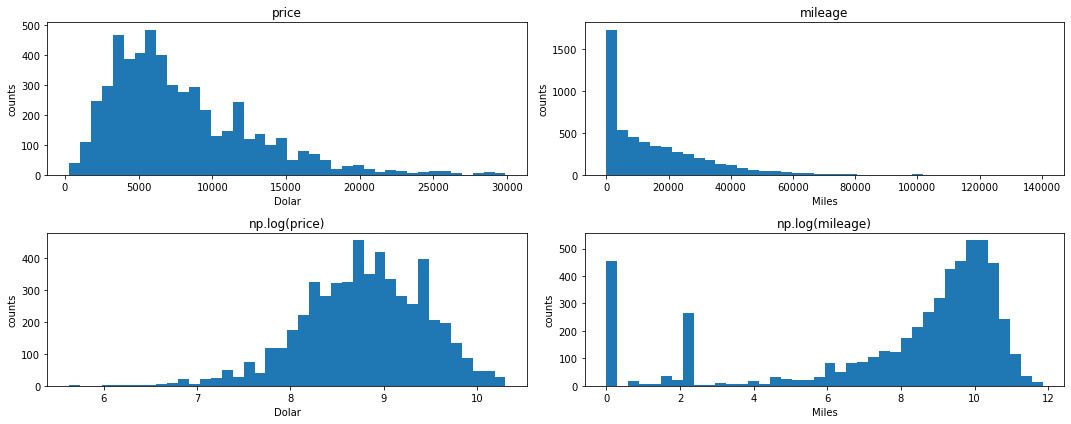

In [24]:
# Zeigen das mit log Transformation Daten normal verteilt sind (registration_age enthält 0 Werte)
fig, ax = plt.subplots(2,2, figsize=(15,6))
ax = ax.flatten()
attribut_log = ['price', 'mileage'] * 2
x_units_log = ['Dolar', 'Miles'] * 2

for i, attr in enumerate(attribut_log):
    if i <=1:
        ax[i].hist(df_moto_clean[[attr]], bins=40)
        ax[i].set_title(attr)
        ax[i].set_xlabel(x_units_log[i])
        ax[i].set_ylabel('counts')
    else:
        ax[i].hist(np.log(df_moto_clean[[attr]]), bins=40)
        ax[i].set_title(f'np.log({attr})')
        ax[i].set_xlabel(x_units_log[i])
        ax[i].set_ylabel('counts')    
    
fig.tight_layout()
plt.show()

**6.** Erweiterung eda mit Fokus auf Ziel Attribut (Marke der Motorräder)  
1. Festlegen welche Attribute verwendet werden sollen
- body_shape: Spezifische Marken produzieren evtl. nur gewisse Motorradtypen
- color: auch wenn Farbe nicht spezifische auf die Marke schliessen lässt, haben bestimmte Marken bevorzugte Farben (Kawasaki-grün)
- condition: da 80% der Motorräder als Occasion markiert sind, wird dieses Attribut vorerst weggelassen
- fuel: 70% sind Benzin Motoren (Benzin + Benzin Bleifrei) die übrigen Kategorien sind praktisch nicht vertreten. Fuel wird vorerst nicht verwendet.
- Bei den nummerischen Attributen werden 'displacment', 'performance', 'price', 'curb_weight' und 'milage' verwendet

2. Prüfen ob Kategorien von Attributen, die selten vorkommen entfernt, kombiniert oder mit upsampling erweitert werden sollen  
- body_shape: Kategorie 'Strasse'domminiert mit >50% der Werten. 

In [25]:
df_moto_clean_mlp = df_moto_clean.copy()
attributs_cat = ['body_shape', 'colour']

body_s_count = pd.DataFrame(df_moto_clean_mlp['body_shape'].value_counts())
body_s_count['percent'] = df_moto_clean_mlp['body_shape'].value_counts() / len(df_moto_clean_mlp[attr])
body_s_count

,body_shape,percent
Strasse,3091,0.571666
Chopper,783,0.144812
Scooter,556,0.102830
Enduro,511,0.094507
Touring,301,0.055669
SupermotoTrial,70,0.012946
Sonstige,44,0.008138
ATVQuad,41,0.007583
Trike,7,0.001295
Seitenwagen,3,0.000555


Kategorien Trike und Seitenwagen. Mit 10 Observationen zu klein für eine vernümpftige Klassifikation.

In [26]:
print(df_moto_clean.shape)
df_moto_clean_mlp = df_moto_clean_mlp[(df_moto_clean_mlp['body_shape'] != 'Trike') & (df_moto_clean_mlp['body_shape'] != 'Seitenwagen')]
df_moto_clean_mlp.shape

(5407, 13)


(5397, 13)

- bei den Farben fällt die seperate Aufteilung der seltenen Matt-Farben auf. Hier soll eine zusätzliches binäres Attribut für die Option 'Matt' (is_matt) dem Datensatz beigefügt werden. 

In [27]:
df_moto_clean_mlp['colour'].value_counts().index

CategoricalIndex(['schwarz', 'rot', 'grau', 'weiss', 'blau', 'grün', 'orange',
                  'Sonstiges', 'silber', 'gelb', 'mehrfarbig', 'anthrazit',
                  'braun', 'schwarz matt.', 'bordeaux', 'beige', 'grau matt.',
                  'weiss matt.', 'rot matt.', 'blau matt.', 'silber matt.',
                  'violett', 'gold', 'grün matt.', 'mehrfarbig matt.',
                  'orange matt.', 'bordeaux matt.', 'anthrazit matt.',
                  'gelb matt.', 'braun matt.', 'gold matt.', 'beige matt.',
                  'violett matt.'],
                 categories=['Sonstiges', 'anthrazit', 'anthrazit matt.', 'beige', 'beige matt.', 'blau', 'blau matt.', 'bordeaux', ...], ordered=False, dtype='category')

In [28]:
# Farbe teilen und neuen spalten namen zuordnen. is_matt als 1 / o codieren
df_moto_clean_mlp[['colour2', 'is_matt']] = df_moto_clean_mlp['colour'].str.split(' ', n=1, expand=True)
df_moto_clean_mlp.loc[:, 'is_matt'] = np.where(df_moto_clean_mlp['is_matt'] == 'matt.', 1, 0)
df_moto_clean_mlp

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year,colour2,is_matt
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0,schwarz,0
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0,rot,0
2,Strasse,grün,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0,grün,0
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,11990,285.0,0,10.0,Kawasaki,0.0,schwarz,0
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,10500,262.0,12,10.0,Kawasaki,1.0,grau,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki,11.0,weiss,0
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki,13.0,schwarz,0
5616,Strasse,schwarz matt.,Occasion,997.0,Benzin,False,188.0,5990,283.0,112,17400.0,Kawasaki,9.0,schwarz,1
5617,Strasse,schwarz,Neu,998.0,Benzin,True,200.0,19990,281.0,0,10.0,Kawasaki,0.0,schwarz,0


In [29]:
color_count = pd.DataFrame(df_moto_clean_mlp['colour2'].value_counts())
color_count['percent'] = df_moto_clean_mlp['colour2'].value_counts() / len(df_moto_clean_mlp[attr])
color_count

,colour2,percent
schwarz,1649,0.305540
rot,700,0.129702
grau,670,0.124143
weiss,559,0.103576
blau,506,0.093756
grün,289,0.053548
orange,235,0.043543
Sonstiges,183,0.033908
silber,153,0.028349
gelb,125,0.023161


Damit sieht die Aufteilung bereits besser aus. Schwarz ist die am häufigsten verbreitete Farbe. 
*Interpretation: Aus den Kategorischen Attributen werden, für das Neuronale Netzwerk, Dummy Variablen erzeugt. Da dann jede Farbe ihre eigen Gewichtung erhält, sollten seltene Farben das Modell nicht verschlechtern und können hier wohl im Datensatz gelassen werden. (Farbe Schwarz erhält eine höhere Gewichtung als die Farbe Gold)*  

3. Numerische Werte
Die Verteilungen der Numerischen Werte sehen, bis auf 'price' und 'milage', vernümpftig aus. 'price' und 'milage' werden, um eine Normalverteilung zu erhalten, Log-Transformiert.

In [30]:
attribut_num = ['displacement', 'performance', 'price', 'curb_weight', 'registration_age', 'mileage']

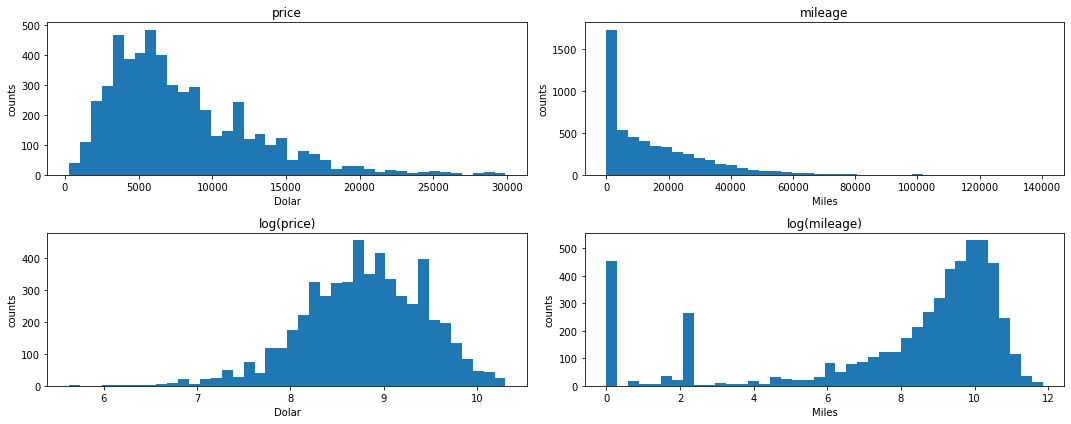

In [31]:
fig, ax = plt.subplots(2,2, figsize=(15,6))
ax = ax.flatten()
attribut_num = ['price', 'mileage']
x_units = [r'Dolar', 'Miles']

for i, attr in enumerate(attribut_num):
    ax[i].hist(df_moto_clean_mlp[[attr]], bins=40)
    ax[i].set_title(attr)
    ax[i].set_xlabel(x_units[i])
    ax[i].set_ylabel('counts')
    
# Log-Transformation price und milage
df_moto_clean_mlp.loc[:, 'price'] = np.log(df_moto_clean_mlp['price'])
df_moto_clean_mlp.loc[:, 'mileage'] = np.log(df_moto_clean_mlp['mileage'])
    
for i, attr in enumerate(attribut_num):
    ax[i+2].hist(df_moto_clean_mlp[[attr]], bins=40)
    ax[i+2].set_title(f'log({attr})')
    ax[i+2].set_xlabel(x_units[i])
    ax[i+2].set_ylabel('counts')    
fig.tight_layout()
plt.show()

4. Untersuchen des Ziel Attributs 'brand'
Yahama, Honda, Kawasaki sind die häufigsten Marken. Buell und Husqvarna mit je ca. 60 Observationen sind eher selten.
Bei den Marken mit wenigen Observationen wird eine Falsch Klassifikation in den Scores nicht korrekt festgestellt (nur ein kleiner Teil mit falschen Vorhersagen). Das einfachste wäre die beiden Marken (Buell und Husqvarna) zu entfernen und in der Beschreibung der Modell Vorhersagen zu erwähnen, das für eine Klassifikation für die beiden Marken zu wenig Daten vorhanden sind.  

Eine weitere Möglichkeit wäre ein Up-/Downsampling. Dabei werden die Observationen von seltenen Marken künstlich, mit Kopien, erhöht und die der häufigen Marken (Yahama, Honda, Kawasakit) reduziert:

In [32]:
brand_count = pd.DataFrame(df_moto_clean_mlp['brand'].value_counts())
brand_count['percent'] = df_moto_clean_mlp['brand'].value_counts() / len(df_moto_clean_mlp[attr])
brand_count

,brand,percent
Yamaha,1067,0.197702
Honda,1014,0.187882
Kawasaki,833,0.154345
Harley-davidson,437,0.080971
Suzuki,403,0.074671
Bmw,344,0.063739
Ducati,337,0.062442
Triumph,320,0.059292
Ktm,300,0.055586
Aprilia,213,0.039466


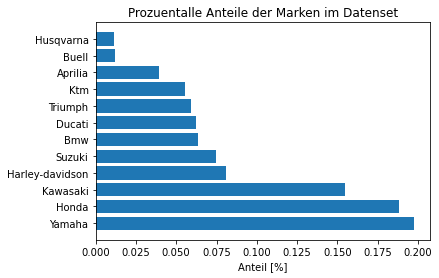

In [33]:
plt.barh(brand_count.index, brand_count['percent'])
plt.title('Prozuentalle Anteile der Marken im Datenset')
plt.xlabel('Anteil [%]')
plt.show()

In [34]:
# Attribute zu unterschiedlichen Anteilen verarbeitet
df_moto_sampling1 = pd.DataFrame()

# Marken namen ohne sampling
brand_names = ['Harley-davidson', 'Suzuki', 'Bmw', 'Ducati', 'Triumph', 'Ktm']
for brand in brand_names:
    # df mit Markenname
    act_brand = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == brand]        
    df_moto_sampling1 = pd.concat([df_moto_sampling1, act_brand])
df_moto_sampling1.shape

(2141, 15)

In [35]:
# Downsampling Yamaha, Honda, Kawasaki
from sklearn.utils import resample
n_sample = 500

yamaha = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Yamaha']
yam_downsample = resample(yamaha,
             replace=False,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, yam_downsample])

honda = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Honda']
hon_downsample = resample(honda,
             replace=False,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, hon_downsample])

kawasaki = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Kawasaki']
kaw_downsample = resample(kawasaki,
             replace=False,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, kaw_downsample])

print(f'Downsampling Yamaha: {yam_downsample.shape}')
print(f'Downsampling Honda: {hon_downsample.shape}')
print(f'Downsampling Kawasaki: {kaw_downsample.shape}')

Downsampling Yamaha: (500, 15)
Downsampling Honda: (500, 15)
Downsampling Kawasaki: (500, 15)


In [36]:
# Upsampling Buell, Husqvarna
from sklearn.utils import resample
n_sample = 250

buell = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Buell']
bue_downsample = resample(buell,
             replace=True,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, bue_downsample])

husqvarna = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Husqvarna']
hus_downsample = resample(husqvarna,
             replace=True,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, hus_downsample])

aprilia = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == 'Aprilia']
apr_downsample = resample(aprilia,
             replace=True,
             n_samples=n_sample,
             random_state=42)
df_moto_sampling1 = pd.concat([df_moto_sampling1, apr_downsample])


print(f'Upsampling Buell: {bue_downsample.shape}')
print(f'Upsampling Husqvarna: {hus_downsample.shape}')
print(f'Upsampling Aprilia: {apr_downsample.shape}')

Upsampling Buell: (250, 15)
Upsampling Husqvarna: (250, 15)
Upsampling Aprilia: (250, 15)


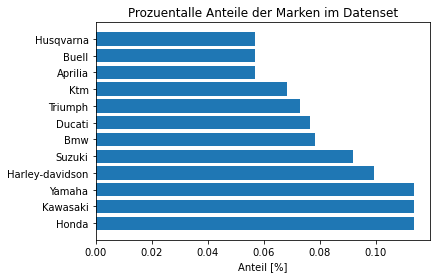

In [37]:
# Berechen Marken Anteile auf dem korrigierten Datensatz
brand_resample_count = pd.DataFrame(df_moto_sampling1['brand'].value_counts())
brand_resample_count['percent'] = df_moto_sampling1['brand'].value_counts() / len(df_moto_sampling1[attr])
brand_resample_count

# Plot die Anteile
plt.barh(brand_resample_count.index, brand_resample_count['percent'])
plt.title('Prozuentalle Anteile der Marken im Datenset')
plt.xlabel('Anteil [%]')
plt.show()

Ein zweiter Ansatz um die Anteil-unterschiede in der Ziel Variable zu beheben ist ein Resample auf alle Marken zu machen.

In [38]:
# Alle Attribute resamplen zu gleichen Anteilen im Datensatz
df_moto_sampling2 = pd.DataFrame()
n_sample = 500

brand_names = df_moto_clean_mlp['brand'].unique()
for brand in brand_names:
    # df mit Markenname
    act_brand = df_moto_clean_mlp[df_moto_clean_mlp['brand'] == brand]
    # up or downsample 
    up_downsample = resample(act_brand,
             replace=True,
             n_samples=n_sample,
             random_state=42)
    
    df_moto_sampling2 = pd.concat([df_moto_sampling2, up_downsample])
print(f'erwartet Zeilen: {n_sample * len(brand_names)}, Zeilen nach resampling: {df_moto_sampling2.shape[0]}')
df_moto_sampling2

erwartet Zeilen: 6000, Zeilen nach resampling: 6000


,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year,colour2,is_matt
102,Chopper,schwarz,Occasion,649.0,Benzin Bleifrei,True,68.0,8.881836,469.0,17,5.857933,Kawasaki,1.0,schwarz,0
439,Strasse,schwarz,Occasion,296.0,Benzin Bleifrei,True,39.0,8.691146,243.0,12,2.302585,Kawasaki,1.0,schwarz,0
270,Strasse,schwarz,Occasion,773.0,Benzin Bleifrei,False,48.0,8.974618,292.0,65,10.338511,Kawasaki,5.0,schwarz,0
106,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,48.0,9.391828,301.0,12,2.302585,Kawasaki,1.0,schwarz,0
71,Chopper,grau,Occasion,948.0,Andere,True,125.0,8.948976,357.0,29,9.448570,Kawasaki,2.0,grau,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5113,Strasse,schwarz,Occasion,1099.0,Benzin,False,154.0,9.169518,271.0,125,10.184900,Ducati,10.0,schwarz,0
5152,Strasse,schwarz,Occasion,583.0,Benzin,False,54.0,8.342840,265.0,259,9.740969,Ducati,22.0,schwarz,0
3218,Strasse,schwarz,Occasion,583.0,Benzin Bleifrei,False,33.0,8.160518,265.0,273,10.308953,Ducati,23.0,schwarz,0
3140,Strasse,rot,Occasion,1198.0,Andere,False,184.0,10.160066,226.0,89,9.287301,Ducati,7.0,rot,0


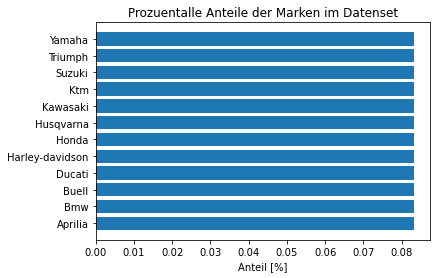

In [39]:
# Berechen Marken Anteile auf dem korrigierten Datensatz
brand_resample_count = pd.DataFrame(df_moto_sampling2['brand'].value_counts())
brand_resample_count['percent'] = df_moto_sampling2['brand'].value_counts() / len(df_moto_sampling2[attr])
brand_resample_count

# Plot die Anteile
plt.barh(brand_resample_count.index, brand_resample_count['percent'])
plt.title('Prozuentalle Anteile der Marken im Datenset')
plt.xlabel('Anteil [%]')
plt.show()

Inwieweit ein resampling auf seltene Daten angewednet werden soll, soll später im MPL geprüft werden (Buell bei df_moto_sampling2 mit je 5 Kopien je Observation).

YOUR ANSWER HERE

### Aufgabe 2 - Testing / Metrics (4 Punkte)

Unterteile den Datensatz sinnvoll in Trainings- und Testteil. Wir werden von diesen Teilen in sämtlichen kommenden Aufgaben Gebrauch machen.

Als Zielmetrik werden wir über alle kommenden Aufgaben mit dem mittleren F1-Score arbeiten, individuell berechnet über alle Klassen.  
Erörtere, was die Eigenschaften dieser Metrik sind und wann sie sinnvoll ist, wann nicht. Trifft dies hier zu?

**Aufteilung des Datensatz**  
Damit eine gleiche Aufteilung der Kategorien in den Marken gewährleistet ist, wird der der Parameter `stratify` von `sklearn.model_selection.train_test_split` verwendet. Dieser sorgt dafür das im Train-Test split gleiche Anzahl Marken vorhanden sind.. ´shuffel´ wird verwendet um allfällige Ordnung im Datenset zu umgehen.

In [40]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

# datenset mit ausgewählten Attributen
mlp_attr = ['body_shape', 'colour2', 'displacement', 'performance', 'price', 'curb_weight', 'mileage', 'brand']
df_moto_sampling1_mlp = df_moto_sampling1[mlp_attr].copy()
df_moto_sampling2_mlp = df_moto_sampling2[mlp_attr].copy()

# Resampling Test 1
#X = df_moto_sampling1_mlp.drop('brand', axis=1).copy()
#y = df_moto_sampling1_mlp['brand'].copy()

# Resampling Test 2
X = df_moto_sampling2_mlp.drop('brand', axis=1)
y = df_moto_sampling2_mlp['brand'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify= y, shuffle=True, random_state=42)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (4800, 7), y_train shape: (4800,)
X_test shape: (1200, 7), y_test shape: (1200,)


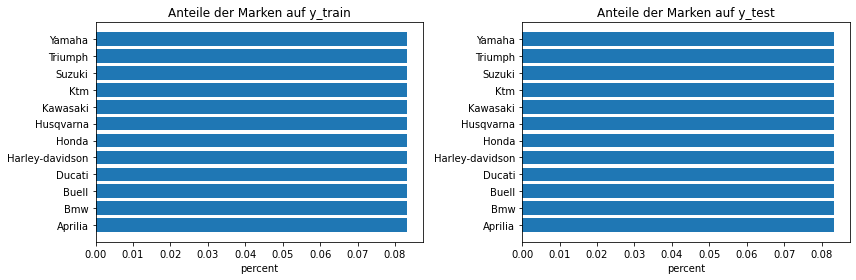

In [41]:
# Testen der Aufteilung der Marken
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax = ax.flatten()
   
# Berechen Marken Anteile auf dem korrigierten Datensatz
count_train = pd.DataFrame(y_train.value_counts())
count_train['percent'] = y_train.value_counts() / len(y_train)
count_train

ax[0].barh(count_train.index, count_train['percent'])
ax[0].set_title('Anteile der Marken auf y_train')
ax[0].set_xlabel('percent')

# Berechen Marken Anteile auf dem korrigierten Datensatz
count_train = pd.DataFrame(y_train.value_counts())
count_train['percent'] = y_train.value_counts() / len(y_train)
count_train

ax[1].barh(count_train.index, count_train['percent'])
ax[1].set_title('Anteile der Marken auf y_test')
ax[1].set_xlabel('percent')

plt.tight_layout()
plt.show()

Folgend werden die **Trainings- und Testdaten** noch **standardisiert** um das Verhältnisse der Attributen auf ein vergleichbares Niveau zu bringen. Da bei der Standardisierung die Mittelwerte und Standardabweichung berechnet werden, wird die Operation seperat auf die Trainings- und Testdaten angewendet und nicht bereits im Eda-Teil. Damit soll 'Information Leakage' von den Testdaten auf die Trainingsdaten reduziert werden. Weiter werden **Dummy-Variablen von den Kategorischen Attributen** erzeugt:

In [42]:
from sklearn import preprocessing

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Standardisierung von X_train und X_test
normalize_attr = ['displacement', 'performance', 'price', 'curb_weight', 'mileage']
X_train_scaler = preprocessing.StandardScaler().fit(X_train[normalize_attr])
X_test_scaler = preprocessing.StandardScaler().fit(X_test[normalize_attr])

# Standardisierte Werte schreiben
X_train_scaled.loc[:, normalize_attr] = X_train_scaler.transform(X_train[normalize_attr])
X_test_scaled.loc[:, normalize_attr] = X_test_scaler.transform(X_test[normalize_attr])

# Dummie Variablen von den Kategorischen Attributen erzeugen
X_train_scaled = pd.get_dummies(X_train_scaled)
X_test_scaled = pd.get_dummies(X_test_scaled)
X_train_scaled

,displacement,performance,price,curb_weight,mileage,body_shape_ATVQuad,body_shape_Chopper,body_shape_Enduro,body_shape_Scooter,body_shape_Seitenwagen,...,colour2_gold,colour2_grau,colour2_grün,colour2_mehrfarbig,colour2_orange,colour2_rot,colour2_schwarz,colour2_silber,colour2_violett,colour2_weiss
3617,-0.467346,-0.203466,-0.300827,-0.080527,-0.028630,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2263,-1.953926,-1.641658,-2.429117,-1.780660,0.387485,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2584,0.158714,0.275931,0.373030,0.000432,-0.528714,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5035,-0.207943,-0.516117,-0.273926,0.194733,0.417278,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3375,0.540336,1.005449,-0.250101,0.113774,0.360627,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.378209,0.025811,-0.027530,-0.080527,0.817745,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3249,-1.145785,-0.828767,-0.097484,-0.890114,-0.382674,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1964,0.909486,0.400991,-0.566193,1.133854,0.859643,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
492,0.288415,0.901232,0.823549,0.000432,-1.744254,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Eigenschaften der F1-Metrik**  

Der F1-Score setzt sich aus Precision und Recall zusammen. Daher werden diese kurz erläutert:

Die **Accuracy** berechnet die korrekte Klassifikation dividiert durch all Vorhersagen. Eine einfache Metrik die, ohne weitere Informationen, nicht sehr informativ ist. Zum Beispiel wenn bei der Klassifikation nicht auf die Klassengrössen geachtet wurde und kleine Klassen immer Falsch vorhergesagt werden, ist dies im Accuracy-Score nur schlecht ersichtlich (Da die mehrheit richtig Vorhergesagt wurde).

Je nach Aufgabenstellung oder Intressen an die Klassifikation können die Modell optimiert werden. Die Schwelle ab welcher Wahrscheinlichkeit Klassen zugeordnet werden kann angepasst werden. Bei Precision werden die Falsch Positiven Vorhersagen mehr Gewichtet. Beispiel: 
Bei Recall werden die Falsch Negativen Vorhersagen stärker Gewichtet. Beispiel:

**Accuracy** Metrik: $Acc = \frac{correct predictions}{all predictions}$  
**Precision** Metrik: $Prec = \frac{TP}{TP + FP}$.  
**Recall** Metrik folgend: $Recall= \frac{TP}{TP + FN}$.

Der **F1-Score** ist nun der harmonische Mittelwert der oben erwähnten Metriken Precision und Recall. Es besteht ein Trad-Off zwischen der optimierung von precision und recall. Wird der Precision-Score optimiert, verschlechtert sich der Recall-Score. Um diesen Trade-Off vorzubeugen wird der F1-Score berechnet. Dieser ist höher wenn die Scores von Preciosion und Recall sehr ähnlich sind und sinkt wenn die Differenz von Precison und Recall zu grösser wird.

**F1-Score** Metrik: $F1 = \frac{2 \cdot (precision \cdot recall)}{(precision + recall)}$

YOUR ANSWER HERE

### Aufgabe 3 - Logistic Regression (5 Punkte)

Als 'Baseline'-Modell verwenden wir logistische Regression.  

Setze einen einfachen regularisierten, rein linearen logistischen Regressionsansatz um. Verwende dazu scikit-learn.  

Evaluiere und diskutiere das Modell auf dem Testdatensatz. Zeichne die Confusion Matrix und berechne die Zielmetrik. 

**Logistisches Modell** erstellen.

In [43]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# erstelle logistische Modell
log_modell1 = LogisticRegression(max_iter=500, random_state=42).fit(X_train_scaled, y_train)

# erstelle Vorhersagen für Train und Test
y_train_pred = log_modell1.predict(X_train_scaled)
y_test_pred = log_modell1.predict(X_test_scaled)

**Confusion Matrix** erstellen.

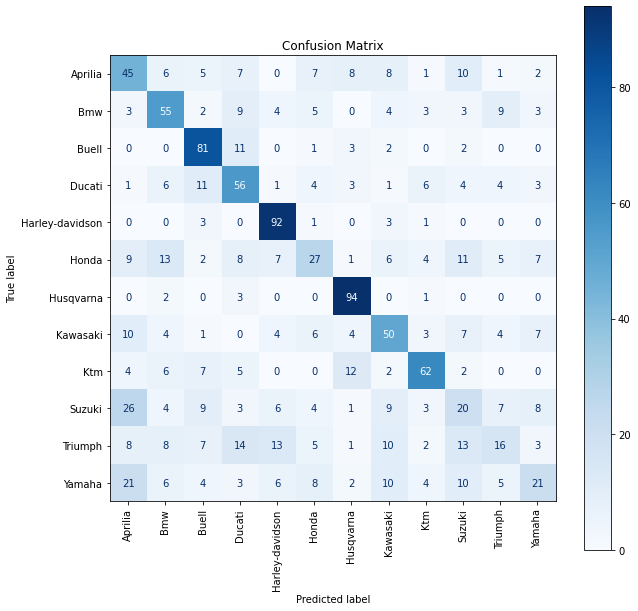

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(log_modell1, X_test_scaled, y_test, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [45]:
def calc_class_scores(y, y_pred, average='micro', print_info=True):
    # berechnen der optionalen Metriken
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average="micro")
    recall = recall_score(y, y_pred, average="micro")
    f1 = f1_score(y, y_pred, average="micro")

    if print_info:
        print(f'Accuracy: {acc:0.3f}')
        print(f'Precision: {prec:0.3f}')
        print(f'Recall: {recall:0.3f}')
        print(f'F1: {f1:0.3f} \n')
        
    return acc, prec, recall, f1

In [46]:
acc_log_model, prec_log_model, recall_log_model, f1_log_model= calc_class_scores(y_train, y_train_pred)

Accuracy: 0.516
Precision: 0.516
Recall: 0.516
F1: 0.516 



Berechnung des **F1-Score** 

$F1-Score = \frac{2 \cdot (precision \cdot recall)}{(precision + recall)}$


In [47]:
# Berechnung mit precision recal
f1_log_model = (2 * prec_log_model * recall_log_model) / (prec_log_model + recall_log_model)
print(f'F1-Score: {f1_log_model:0.3f}')

F1-Score: 0.516


**Diskusion** einfache Logistische Model:  


**Testen von sklearn**
Das logistische Regressionsmodell von sklearn hat einen Parameter `class_weight`. Dieser soll einem unbalanced Datenset den Klassen Gewichte zuordnen. Im eda Teil wurde das unbalancierte Datenset bereits angesprochen und entsprechend behandelt. Dennoch wäre es intressant zu sehen wie sich ein Modell mit `class_weight='balanced'` und dem orginalen Datenset df_moto_clean_mlp schlägt:

In [48]:
def create_log_modell_weight(balanced_dataset:bool):
    global X_train_weight_scaled
    global X_test_weight_scaled
    global y_train_weight
    global y_test_weight
    
    # datenset mit ausgewählten Attributen für Modell
    mlp_attr = ['body_shape', 'colour2', 'displacement', 'performance', 'price', 'curb_weight', 'mileage', 'brand']
    df_moto_mlp_weight = df_moto_clean_mlp[mlp_attr].copy()

    # Train- Testsplit
    X_weight = df_moto_mlp_weight.drop('brand', axis=1)
    y_weight = df_moto_mlp_weight['brand'].copy()

    X_train_weight, X_test_weight, y_train_weight, y_test_weight = train_test_split(X_weight, y_weight, test_size=0.2, 
                                                                    stratify= y_weight, shuffle=True, random_state=42)
    # Standardisierung von X_train und X_test
    X_train_weight_scaled = X_train_weight.copy()
    X_test_weight_scaled = X_test_weight.copy()

    normalize_attr = ['displacement', 'performance', 'price', 'curb_weight', 'mileage']
    X_train_weight_scaler = preprocessing.StandardScaler().fit(X_train_weight[normalize_attr])
    X_test_weight_scaler = preprocessing.StandardScaler().fit(X_test_weight[normalize_attr])

    # Standardisierte Werte schreiben
    X_train_weight_scaled.loc[:, normalize_attr] = X_train_weight_scaler.transform(X_train_weight[normalize_attr])
    X_test_weight_scaled.loc[:, normalize_attr] = X_test_weight_scaler.transform(X_test_weight[normalize_attr])

    # Dummie Variablen von den Kategorischen Attributen erzeugen
    X_train_weight_scaled = pd.get_dummies(X_train_weight_scaled)
    X_test_weight_scaled = pd.get_dummies(X_test_weight_scaled)

    if balanced_dataset: 
        # erstelle logistische Modell mit Gewichtung
        log_modell_weight = LogisticRegression(max_iter=500, class_weight='balanced', 
                                    random_state=42).fit(X_train_weight_scaled, y_train_weight)
    else:
        # erstelle logistische Modell ohne Gewichtung
        log_modell_weight = LogisticRegression(max_iter=500, class_weight=None, 
                                    random_state=42).fit(X_train_weight_scaled, y_train_weight)

    # erstelle Vorhersagen für Train und Test
    y_train_weight_pred = log_modell_weight.predict(X_train_weight_scaled)
    y_test_weight_pred = log_modell_weight.predict(X_test_weight_scaled)
    
    return log_modell_weight, y_train_weight_pred, y_test_weight_pred

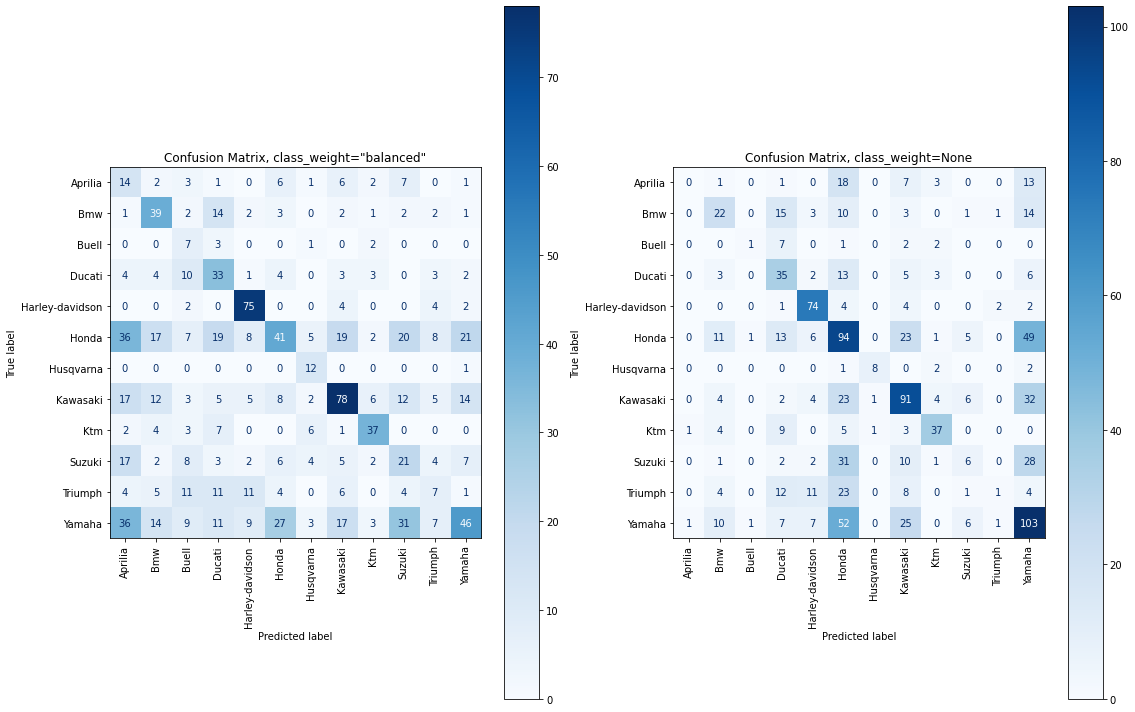

In [49]:
fig, ax = plt.subplots(1,2, figsize=(16, 10))
ax = ax.flatten()

# Modelle erstellen für class_weight='balanced' und class_weight=None.
log_modell_weight_true, y_train_weight_true_pred, y_test_weight_true_pred = create_log_modell_weight(balanced_dataset=True)
log_modell_weight_false, y_train_weight_false_pred, y_test_weight_false_pred = create_log_modell_weight(balanced_dataset=False)

# Confusion Plot zeichnen
plot_confusion_matrix(log_modell_weight_true, X_test_weight_scaled, y_test_weight, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title('Confusion Matrix, class_weight="balanced"')

plot_confusion_matrix(log_modell_weight_false, X_test_weight_scaled, y_test_weight, 
                      xticks_rotation='vertical', cmap=plt.cm.Blues, ax=ax[1])
ax[1].set_title('Confusion Matrix, class_weight=None')

fig.tight_layout()
plt.show()

In [50]:
# berechnen der optionalen Metriken
print('Logistisches Modell mit class_weight=balanced')
acc_log_model2, prec_log_model2, recall_log_model2, F1_log_modell2 = calc_class_scores(y_test_weight, y_test_weight_true_pred)
print('Logistisches Modell mit class_weight=None')
acc_log_model3, prec_log_model3, recall_log_model3, F1_log_modell3 = calc_class_scores(y_test_weight, y_test_weight_false_pred)

Logistisches Modell mit class_weight=balanced
Accuracy: 0.380
Precision: 0.380
Recall: 0.380
F1: 0.380 

Logistisches Modell mit class_weight=None
Accuracy: 0.437
Precision: 0.437
Recall: 0.437
F1: 0.437 



Die zwei erstellten Modelle (mit und ohhe balanciertem Datenset) führen zu unterschiedlichen Confusion Matrizen. Der Score mit paramater `class_weight='balanced'` von sklearn ist tiefer als mit `class_weight=None`. Dies zeigt gut die Problematik bei Daten mit unterschiedlich grossen Klassen. Der Score ist zwar höher aber die kleineren Klassen wurden sehr oft Falsch Klassifiziert.  

Das eigen balancierte Datenset hat einen höheren Score auf den Train-Testdaten erziehlt. Hier soll getestet werden wie sich das Modell1, welches auf dem eigenen balancierten Datenset trainiert wurde auf den originalem kompletten unbalanced Datenset schlägt. Der Test soll zeigen ob die angewendeten Resampling Methoden (Up-Downsampling) zu einem besseren Modell  führt.

Logistisches Modell1 auf dem komplettem unbalanced Datenset
Accuracy: 0.383
Precision: 0.383
Recall: 0.383
F1: 0.383 



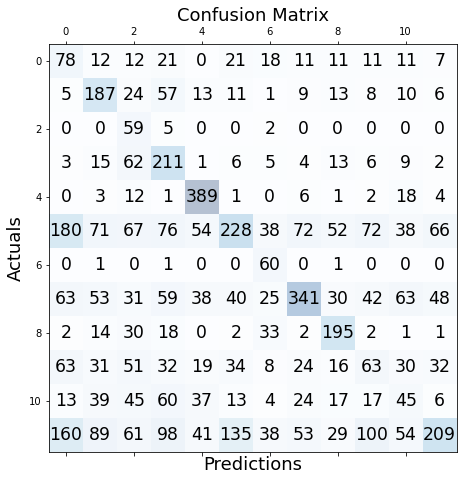

In [51]:
mlp_attr = ['body_shape', 'colour2', 'displacement', 'performance', 'price', 'curb_weight', 'mileage', 'brand']
log_model1_all_data = df_moto_clean_mlp[mlp_attr].copy()
X_all = log_model1_all_data.drop('brand', axis=1).copy()
y_all =log_model1_all_data['brand'].copy()

# Standardisierung von X_train und X_test
X_all_scaled = X_all.copy()

normalize_attr = ['displacement', 'performance', 'price', 'curb_weight', 'mileage']
X_all_scaler = preprocessing.StandardScaler().fit(X_all_scaled[normalize_attr])

# Standardisierte Werte schreiben
X_all_scaled.loc[:, normalize_attr] = X_all_scaler.transform(X_all_scaled[normalize_attr])
# Dummie Variablen von den Kategorischen Attributen erzeugen
X_all_scaled = pd.get_dummies(X_all_scaled)

# Vorhersage durch Modell 1
y_all_pred = log_modell1.predict(X_all_scaled)
print('Logistisches Modell1 auf dem komplettem unbalanced Datenset')
acc_log_model2, prec_log_model2, recall_log_model2, F1_log_modell2 = calc_class_scores(y_all, y_all_pred)

# zeichne Confusion Matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
conf_matrix = confusion_matrix(y_true=y_all, y_pred=y_all_pred)
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Der Score ist sehr tief, somit könnten die ausgeführten Resampling Operation im eda-teil etwas zu stark sein. Bevor Anpassungen vorgenommen werden soll das MLP ausprobiert werden. Zum mindest werden auch die kleinen Marken verarbeitet.

### Aufgabe 4 - Multi-Layer Perceptron (15 Punkte)

Implementiere ein Multi-Layer Perceptron mit sigmoider Aktivierungsfunktion und $l_2$-Regularisierung durch Ergänzen der folgenden Klasse.  

Zeige mit Hilfe des kleinen Entwicklungsdatensatzes `dev_data.csv`, dass die Umsetzung des Gradienten korrekt ist unter Verwendung der Methode `grad_check()`. 
Erkläre, was `grad_check` macht.

Zeige weiter, dass

- Gradient Descent konvergiert.
- eine Accuracy > 0.8 erzielt werden kann.
- die Regularisierung den gewünschten Effekt hat.

Verwende aus der Library `mlxtend.plotting` die Funktion `plot_decision_regions` zum Zeichnen der Decision Regions und der Decision Boundary.  
Bechreibe den Plot.  

Ermögliche weiter die Verwendung der Bibliotheksfunktion `scipy.optimize.minimize` zur Optimierung der Modell-Koeffizenten $\theta$.  
Zeige, dass auch das funktioniert. Zeichne insbesondere den Verlauf der Kostenfunktion über das Iterationsverfahren hinweg, wenn du den Solver `L-BFGS-B` verwendest.

In [52]:
import numpy as np
import sys

from sklearn.preprocessing import OneHotEncoder 

class MLP(object):
    ''' A Multi-Layer Perceptron.
    '''

    def __init__(self, layers, weight_init_int=(-.7, .7), method='fullbatch',
            max_iter=1000, learning_rate=0.3, dlr=0.1, alpha=0., epsilon=0.01,
            minimethod='CG', batchsize=30):
        '''
        layers: tuple
            The elements of the tuple define the number of units in all hidden
            layers (bias units not included), i.e. a tuple (20, 30, 40) defines
            a MLP with three hidden layers of 20, 30 and 40 hidden units plus
            bias units.

        weight_init_int: tuple =(-.7, .7)
            The interval on which the weights/thetas will be randomly initialized.

        alpha: float
            The l2 regularization strength.

        method: string
            'fullbatch', 'minibatch', 'sgd', 'minimize'

        epsilon: float
            The threshold value for the length of the gradient for stopping gradient
            descent iterations.
            
        learning_rate: float
            The (initial) step size.
            
        max_iter: int
            The maximal number of gradient descent iterations.
            
        dlr: float
            The adaptive learning rate constant d.
            
        batchsize: int
            The number of samples in batch when using the minibatch method for optimizing.
            
        minimethod: string
            The algorithm used by the minimize library function for optimizing the
            model coefficients / thetas / weights. (use 'CG' or 'L-BFGS-B')
        '''
        # the model
        self.layers = layers
        self.weight_init_int = weight_init_int
        self.alpha = alpha
        # basic gradient decscent params
        self.method = method
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        # batched gradient descent
        self.dlr = dlr
        self.batchsize = batchsize
        # when using scipy.optimize.minimize
        self.minimethod = minimethod
        # more
        self.input_layer = 0
        self.output_layer = 0
        self.theta_ = []
        self.theta_shapes_ = []  # dim
        self.Zn_ = []
        self.An_ = []
        self.y_colnames = []
        self.X_norm_mean = 0
        self.X_norm_std = 0.001

        print('MLP(layers={}, weight_init={}, method="{}", alpha={}, learning_rate={}, dlr={})'.format(
            self.layers, self.weight_init_int, self.method, self.alpha, self.learning_rate, self.dlr))
    
    def fit(self, X, y):
        '''
        Configures input and output layer, initializes weights and fits the
        model coefficients.
        '''
        # Standardisierung der Daten
        #X = normalize_data(X)
        
        # initialize the entire network, including input and ouput layer
        self._init_network(X, y)
        n_data_obs = 0

        if self.method == 'fullbatch':
            # YOUR CODE HERE
            n_data_obs = 1
            
        elif self.method == 'sgd':
            # YOUR CODE HERE
            raise NotImplementedError()            
            
        elif self.method == 'minibatch':
            # batchsize beschreibt einen Teil der verwendeten Daten für minibatch
            n_data_obs = round(X.shape[0] / self.batchsize)          

        elif self.method == 'minimize':
            # YOUR CODE HERE
            raise NotImplementedError()
            
        return self

    @staticmethod
    def cost_function(theta_, alpha, X, y, theta_shapes=None):
        '''Computes the cross-entropy cost function.

        Uses MLP.forward_propagation

        Arguments
        ---------
        theta_ : the weights of the neural network
        alpha : the regularization strength
        X, y : the data
        theta_shapes : a list of tuples defining the shapes of theta

        Returns
        -------
        J : cost function value given thetas
        '''
        # Implementation Hint:
        # Use np.nan_to_num to ensure numpy handles values very close to zero
        # correctly in the log function

        # Erstelle alle Vorhersagen. Forward Propagation verabeitet nur eine Observation
        A = MLP.forward_propagation(theta_, X)
        A_last = A[-1]
        
        # Anzahl Observationen
        n_obs = X.shape[0]

        # unroll Thetas
        theta_unrolled = MLP.unroll(theta_)

        # Cross-entropy mit L2 Regularisierung 
        # Regularisierungs term Reg (L2)
        Reg = (alpha/(2*n_obs)) * np.sum(theta_unrolled**2)
        # Cross-entropy Formel
        J = - 1/n_obs * (y.T @ np.nan_to_num(np.log(A_last)) + (1-y).T @ np.log(1-np.nan_to_num(A_last)) + Reg)

        ######################################## Dimensions Tests
        #b = y.T @ np.log(A_last) # skalar
        #c = (1-y).T @ np.log(1-A_last) # skalar
        #d = (y.T @ np.log(A_last) + (1-y).T @ np.log(1-A_last)) + Reg  #skalar
        #return b, c, d, J
        ########################################

        return J

    @staticmethod
    def gradient_cost_function(theta_, alpha, X, y, theta_shapes=None, binary_y_data = False):
        '''Computes the gradient of the cost function.

        Arguments
        ---------
        theta_ : the weights of the neural network
        theta_shapes : a list of tuples defining the shapes of theta
        alpha : the regularization strength
        X, y : the data

        If theta_shapes is provided (i.e. not None) the thetas are received as
        a 1-d array and rolled-up first. The gradient is then computed. After
        that, if rolled-up initially, the gradient is unrolled again, e.g. for
        further use in an optimizer.

        Returns
        -------
        grad : the gradient of the cost function
        '''
        # 
        theta_ = MLP.rollup_if(theta_, theta_shapes)
        gradient = [0 for theta in range(len(theta_))]
        
        # Je Observation / Datenpunkt Aktivierung und Delta berechnen
        for one_observation in range(X.shape[0]):
            
            a = MLP.forward_propagation(theta_, X[one_observation, :])
            # Unterscheidung falls y onehot encoding in einer einer Spalte passiert, also nur binär ist
            if binary_y_data:
                d = MLP.back_propagation(theta_, a, y[one_observation])
            else:
                d = MLP.back_propagation(theta_, a, y[one_observation, :])
            for i, delta_layer in enumerate(d):
                #new_gradient = delta_layer.reshape(-1, 1) @ np.array(a[i])
                new_gradient = delta_layer @ a[i]
                gradient[i] = gradient[i] + new_gradient
                
        for i in range(len(gradient)):
            gradient[i] = gradient[i] / X.shape[0]
            # Regularisierung ohne Bias Term
            theta_no_bias = theta_[i].copy()
            theta_no_bias[:, 0] = 0
            gradient[i] += (theta_no_bias * alpha)

        gradient_unrolled = MLP.unroll(gradient)

        return gradient_unrolled
        
        
    
    @staticmethod
    def forward_propagation(theta, x, print_info=False):
        '''Computes the activations for all units in an MLP given by theta for
        a single data point x.

        Returns
        -------
        a : activations of all units as a list of arrays
        '''
        # speichern von Zwischenresultaten An(zn) = aktiviereung des Layers
        Z = []
        A = []
        
        # set input data x as first layer a1 (+1 for bias)
        # +1 für Bias Term        
        a0 = np.ones(len(x)+1)
        a0[1:] = x
        #A.append(a0)
        
        for theta_n in theta:
            # berechne x oder a**-1 mit Weights (+Bias)
            # Wenn Zn leer dann Inputdaten verwenden
            if len(Z) == 0:
                z = theta_n @ a0.T
            else:
                z = theta_n @ a.T
            # Berechne Aktivierungs Funktion
            a = MLP.act_func(z)
            
            Z.append(z)
            A.append(a)
        return A
         

    @staticmethod
    def back_propagation(theta, a, y, return_delta=False):
        '''Computes the error d for all units.
        theta: Gewicht
        a: Aktivierung
        y: Vorhersage forward Propagation

        Returns
        -------
        d : the error (small delta) propagated back through the network as list
        of arrays.
        '''
        # YOUR CODE HERE
        # Erstelle delta array
        d = [np.nan for _ in range(len(theta))]
        
        # erster und letzter Layer  (Input/Output Layer) nicht berechnen -> -1
        H = len(theta) - 1
        
        for L in range(H, -1, -1):
            #print('index L :', L)
            
            # Berechnung des letzten Layers (L) oder des ersten layers von Backpropagation
            if L == H:
                delta = (a[L] - y)               
            # Berechnungen der weiteren layer
            else:
                delta = theta[L+1].T @ delta
            
            # sigmoid(z) -> a, nun mit umkehrfunktion sigmoid wieder z erhalten
            z = delta * (a[L] * (1 - a[L]))
                
            # Bias verschwindet bei der Ableitung, somit hier entfernen
            #d[L] = np.delete(z, 0, 0)
            
            d[L] = z
                             
        return d

        

    def grad_check(self, X, y, epsilon=0.0001, decimal=3, verbose=False):
        '''Compare the gradient with finite differences around current point
        in parameter space.
        '''
        if not 'theta_' in dir(self):
            _ = self._init_network(X, y)

        theta_ur = MLP.unroll(self.theta_)

        # approximate the gradient with finite differences
        approxgrad = []
        for idx in range(len(theta_ur)):
            # modify theta[idx] +/- epsilon
            tplus = theta_ur.copy()
            tplus[idx] = tplus[idx]+epsilon
            tminus = theta_ur.copy()
            tminus[idx] = tminus[idx]-epsilon
            # calculate the costfunctions
            minuseps = MLP.cost_function(tminus, self.alpha, X, y, self.theta_shapes_)
            pluseps = MLP.cost_function(tplus, self.alpha, X, y, self.theta_shapes_)
            # finite diffs
            approxgrad.append((pluseps - minuseps)/(2*epsilon))

        approxgrad = np.array(approxgrad)

        # compare normalized gradients
        approxgrad /= np.linalg.norm(approxgrad)
        calcgrad = MLP.gradient_cost_function(theta_ur, self.alpha, X, y, self.theta_shapes_, binary_y_data = True)
        # compare normalized gradients
        calcgrad /= np.linalg.norm(calcgrad)

        if verbose:
            print('approx : ', approxgrad)
            print('backprop : ', calcgrad)

        np.testing.assert_array_almost_equal(approxgrad, calcgrad, decimal=decimal)

    def predict(self, X):
        '''Predicts the output for all data points in X.

        Makes use of MLP.forward_propagation

        Returns
        -------
        prediction of output
        '''
        # berechne Vorhersage für jedes x
        y_prediction = []
        for x_obs in range(X.shape[0]):
            y_pred_prob = MLP.forward_propagation(self.theta_, X[x_obs, :])
            # Vorhersage mit der höchsten Wahrscheinlichkeit
            y_pred = self.y_colnames(np.argmax(y_pred_prob))
            
            y_prediction.append(y_pred)        
        
        return y_prediction

    def score(self, X, y, average='micro', print_info=True):
        '''Computes the accuracy metric for the predictions on X, given the
        true output y.

        Returns
        -------
        accuracy : metric computed for X and y, invoking a prediction on X,
        given the current model
        '''
        # YOUR CODE HERE
        y_pred = self.predict(X)
        
        # berechnen aller Metriken
        acc = accuracy_score(y, y_pred)
        prec = precision_score(y, y_pred, average=average)
        recall = recall_score(y, y_pred, average=average)
        f1 = f1_score(y, y_pred, average=average)

        if print_info:
            print(f'F1: {f1:0.3f} \n')
            print(f'Accuracy: {acc:0.3f}')
            print(f'Precision: {prec:0.3f}')
            print(f'Recall: {recall:0.3f}')            
        
        return  f1, acc, prec, recall

    @staticmethod
    def rollup_if(x_, shapes):
        '''Conditional uprolling if shapes is not None.

        Returns
        -------
        x : list of arrays, if shapes provided, input x_ otherwise
        True/False : True if input has been rolled up.
        '''
        # YOUR CODE HERE
        if(shapes != None):
            return MLP.rollup(x_, shapes)
        
        return x_

    @staticmethod
    def unroll(xlist):
        '''Unrolling theta in a 1d array (that can be passed into minimize).

        Returns
        -------
        x : unrolled 1-d array
        '''
        # x als 1d array festlegen
        thetas_flattend = []
        # jedes element in theta flachklopfen
        for theta in xlist:
            thetas_flattend.extend(theta[:, 1:].flatten())
            
        thetas_flattend = np.array(thetas_flattend) 
         
        return thetas_flattend

    @staticmethod
    def rollup(xur, shapes):
        '''Rolling up theta into a list of 2d matrices.

        Returns
        -------
        xlist : list of 2-d arrays extracted from xur, reshaped into shapes.
        '''
        # Aufrollen zur Ursprünglichen theta liste anhand der Dimensionen in den layers
        xlist = []
        pos = 0
        for shape_layer in shapes:
            # Anzahl elemente nach dimension layers
            n_elem = shape_layer[0] * shape_layer[1]
            # alle Werte des xten Layers aus dem flachen Array ziehen
            val_layer_x = xur[pos:pos + n_elem]
            print('xur len', len(xur))
            for xur_ele in xur:
                print('xur ele len', len(xur_ele))
            #print('val len', len(val_layer_x))
            #print(val_layer_x)
            # Werte als Vektoren (array+reshape) in der Liste speichern
            xlist.append(np.array(val_layer_x).reshape(shape_layer))
            # Position des nächsten Layers
            pos += n_elem
            
        return xlist

    @staticmethod
    def phi(t):
        '''Logistic / sigmoid function.'''
        return 1. / (1 + np.exp(-t))

    def _init_network(self, X, y):
        '''Initializes all that's necessary to start training.

        - transforms y as required to one-hot-encoding and returns encoded y_
        - completes self.layers
        - initializes thetas, using MLP.theta_init, as list of 2-d matrices
        - sets self._theta_shapes (needed for unrolling and uprolling)

        (uses init_theta())

        Returns
        -------
        y_ : one-hot encoded categories contained in y.
        '''
        # dummie variable y
        y_ = pd.get_dummies(y)
        self.y_colnames = pd.get_dummies(y).columns.to_list()
        
        # get Input/Outpur data shape for input/output layer
        self.input_layer = X.shape[1]
        self.output_layer = y_.shape[1]
        
        # init thetas list 2d-matrix. Das +1 für den bias term
        all_layers = [self.input_layer+1, self.layers[0]+1,self.layers[1]+1, self.layers[2]+1, self.output_layer]
        self.theta_ = MLP.init_theta(all_layers, self.weight_init_int, print_info=True)
        
        # get theta shape
        for theta in self.theta_:
            self.theta_shapes_.append(theta.shape)
            
        return y_

    @staticmethod
    def init_theta(layers, weight_init_int, print_info=False):
        '''Initializes the thetas and returns them as a list of 2-d matrices.

        Returns
        -------
        theta : list of model coefficients 2-arrays according to the layer
        specification.
        '''
        # YOUR CODE HERE
        np.random.seed(42)
        thetas = []
        for n_layer in range(len(layers)-1):
            theta = np.random.uniform(low=weight_init_int[0], high=weight_init_int[1], 
                                      size=(layers[n_layer+1],layers[n_layer]))
            # set bias gewicht = 1 auf dem ersten theta element
            for n_dim in range(len(theta)):
                theta[n_dim][0] = 1
                
            # append thetas
            thetas.append(theta)
            if print_info:    
                print(f'theta{n_dim}:', theta.shape)
                
        return thetas
    
    @staticmethod
    def act_func(z):
        '''
        Berechnung der Sigmoid Aktivierungs Funktion
        '''
        return (1.0 / (1.0 + np.exp(-z)))
    
    @staticmethod
    def act_func_derivative(z):
        '''
        Berechnung der Ableitung der Sigmoid Aktivierungs Funktion
        '''
        return MLP.act_func(z) * (1 - MLP.act_func(z))
    
    @staticmethod
    def cross_entropy(y, y_pred, alpha):
        if y == 1:
            return -np.log(y_pred)
        else:
            return -np.log(1 - y_pred)
        
    def normalize_data(X):
        self.X_norm_mean = X.mean(axis=0)
        self.X_norm_std = X_std(axis=0)
        
        # Standardisieren
        X_norm = (X - self.X_norm_mean) / self.X_norm_std
        return X_norm
    
    
    # ADD ADDITIONAL UTILITY METHODS HERE
    # YOU CAN REMOVE THE NotImplementedError right
    # YOUR CODE HERE

**Unittests**

In [53]:
def test_set_theta_first_element_one():
    # arrange    
    weight_init_int = [-0.7, 0.7]
    layers = [21, 11, 31, 41, 6]
    theta_soll = []
    theta_ist = []
    
    for n_layer in range(len(layers)-1):
        np.random.seed(42)
        theta = np.random.uniform(low=weight_init_int[0], high=weight_init_int[1], 
                                      size=(layers[n_layer+1],layers[n_layer]))
        # set bias gewicht = 1 auf dem ersten theta element
        for n_dim in range(len(theta)):
            theta[n_dim][0] = 1
                
        # append thetas
        theta_soll.append(theta)
    
    # act
    theta_ist = MLP.init_theta(layers, weight_init_int, print_info=False)
    
    # assert
    assert len(theta_soll) == len(theta_ist), 'theta length no equal'
    #assert np.array_equal(theta_soll, theta_ist), 'theta_soll not equal theta_ist'
    #return theta_soll, theta_ist
    
test_set_theta_first_element_one()

**Test Forward Propagation**

In [54]:
# Demo Daten
x = np.array([1,2,5,7,8])
y = np.array([2,3,2])
# Demo Live Daten
X = df_moto_sampling1_mlp.drop('brand', axis=1).copy()
y = df_moto_sampling1_mlp['brand'].copy()
y_ = pd.get_dummies(y)
y_ = np.array(y_)
y_colnames = pd.get_dummies(y).columns.to_list()
X = pd.get_dummies(X)
X = np.array(X).copy()
x = np.array(X[10,:]).copy()
y_onesample = y_[10,:].copy()

# Init MLP
weight_init_int = [-0.7, 0.7]
layers = [len(x.T)+1, 11, 31, 41, len(y_colnames)]
# theta MLP
theta_test = MLP.init_theta(layers, weight_init_int, print_info=False)
print(f'theta_0 shape: {theta_test[0].shape}, x length (+1): {x.shape}')

theta_0 shape: (11, 33), x length (+1): (32,)


In [55]:
# Prediction MLP
a = MLP.forward_propagation(theta_test, x)
print('len a:', len(a))
print('len y_:', len(y_onesample))
print('len y_pred:', len(a[-1]))
y_onesample, a[-1]

len a: 4
len y_: 12
len y_pred: 12


<ipython-input-52-42db1f5a3b85>:491: RuntimeWarning: overflow encountered in exp
  return (1.0 / (1.0 + np.exp(-z)))


(array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0.66062803, 0.69866618, 0.45487078, 0.94083042, 0.90130629,
        0.90811398, 0.72419692, 0.32046289, 0.35204162, 0.86905029,
        0.36051795, 0.74252528]))

In [56]:
for i, ele in enumerate(a):
    print(f'a{i}: {len(a[i])}')
a[0]

a0: 11
a1: 31
a2: 41
a3: 12


array([1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 0.00000000e+000,
       1.09889157e-115, 1.11488849e-140, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000])

**Test Backpropagation**

In [57]:
deltas = MLP.back_propagation(theta_test, a, y_onesample)
for i, delt in enumerate(deltas):
    print(f'len delta {i}:', len(delt))
deltas[3]

len delta 0: 11
len delta 1: 31
len delta 2: 41
len delta 3: 12


array([ 0.1481119 ,  0.14709141,  0.11279128,  0.05237466, -0.00877913,
        0.07577573,  0.14464801,  0.06978606,  0.08030362,  0.09889956,
        0.08311552,  0.14195709])

**Test Kostenfunktion**

In [58]:
MLP.cost_function(theta_test, alpha=1, X=x, y=y_onesample)

<ipython-input-52-42db1f5a3b85>:491: RuntimeWarning: overflow encountered in exp
  return (1.0 / (1.0 + np.exp(-z)))


0.2508378286490403

**Test gradient_cost_function**

In [59]:
# get theta shape
theta_test_shape = []
for theta in theta_test:
    theta_test_shape.append(theta.shape)
print('theta_test_shapes: ', theta_test_shape)
y_

theta_test_shapes:  [(11, 33), (31, 11), (41, 31), (12, 41)]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [60]:
MLP.gradient_cost_function(theta_test, 1, X, y_, theta_shapes=None)  # None == kein 1d-array

<ipython-input-52-42db1f5a3b85>:491: RuntimeWarning: overflow encountered in exp
  return (1.0 / (1.0 + np.exp(-z)))


array([0.60440249, 0.29819398, 0.11152434, ..., 0.8940174 , 0.30692968,
       0.57828557])

**Test MLP grad_check** mit 'dev_data.csv'

In [61]:
# Einlesen der Daten 
df_dev_data = pd.read_csv('../data/dev_data.csv')
X = df_dev_data[['X1', 'X2']]
X = np.array(X)
y = np.array(df_dev_data['y'])

# Modell erstellen und Gradienten mit grad_check() prüfen
mlp_model = MLP((10, 15, 20), learning_rate=0.3, max_iter=1000, alpha=0., epsilon=5e-3)
mlp_model.grad_check(X, y, verbose=False)

MLP(layers=(10, 15, 20), weight_init=(-0.7, 0.7), method="fullbatch", alpha=0.0, learning_rate=0.3, dlr=0.1)


**MLP predict Test** 

In [62]:
mlp_test = MLP(layers=(11, 31, 41), weight_init_int=(-.7, .7), method='minibatch',
            max_iter=1000, learning_rate=0.3, dlr=0.1, alpha=0., epsilon=0.01,
            minimethod='CG', batchsize=30)

MLP(layers=(11, 31, 41), weight_init=(-0.7, 0.7), method="minibatch", alpha=0.0, learning_rate=0.3, dlr=0.1)


In [65]:
mlp_test.fit(X, y)

theta11: (12, 3)
theta31: (32, 12)
theta41: (42, 32)
theta1: (2, 42)


In [ ]:
#mlp_test.score(X,y)

YOUR ANSWER HERE

### Aufgabe 5 - MLP Anwendung (5 Punkte)

Verwende deine Implementierung des Multi-Layer Perceptrons, um unseren Datensatz zu klassifizieren.  
(Falls deine Implementierung nicht funktionieren sollte, kann du scikit-learn verwenden. Damit kannst du noch 3 Punkte erreichen.)

Finde ein möglichst gutes Modell im Sinne der Zielmetrik.  

Evaluiere und diskutiere die Resultate, zeichne dabei auch die Confusion Matrix auf dem Testset.  

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 6 - Decision Tree - Theorie (6 Punkte)

Erkläre wie ein Decision Tree erstellt wird.  

Welche Rolle spielen dabei Metriken wie die Entropie oder Gini-Index?  

Was sind die Eigenschaften der Decision Boundary bei Decision Trees?  

Wodurch kann bei Decision Trees Overfitting entstehen? Diskutiere welche Ansätze möglich sind, um Overfitting zu vermeiden.

YOUR ANSWER HERE

### Aufgabe 7 - Decision Tree - Anwendung I (4 Punkte)

Betrachte nun eine Vorhersage der Variablen `has_mfk`.  
Berechne dazu einen Entscheidungsbaum mit vier Teilräumen 'manuell', das heisst, bloss auf der Basis von Numpy-Funktionalität und unter Verwendung des Gini-Index.  

Visualisiere den resultierenden Baum und diskutiere seine Entstehung.  

Wie gut ist die Vorhersage? 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 8 - Decision Tree - Anwendung II (5 Punkte)

Verwende nun einen Decision Tree von scikit-learn zur Klassifikation von `brand`.

Zeichne den besten resultierenden Baum und erkläre ihn.

Evaluiere und diskutiere die Resultate, zeichne dabei auch die Confusion Matrix auf dem Testset.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 9 - Bestes Modell (4 Punkte)

Nun bist du frei eine beliebiges scikit-learn Modell zur Vorhersage von `brand` zu verwenden, um eine möglichst gute Vorhersage im Sinne unserer Zielmetrik zu erreichen.  

Zeichne die Confusion Matrix auf dem Testset und diskutiere die Resultate.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 10 - Übersicht der Resultate (3 Punkte)

Stelle die Resultate der verschiedenen Modelle zur Vorhersage von `brand` in einer Tabelle zusammen und auch graphisch dar.  

Diskutiere deine Einsichten.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE